<a href="https://colab.research.google.com/github/Sahel-Eskandar/DataScience-Projects/blob/main/13_Transfer_Leaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Leaning

Sahel Eskandar

## **Build VGG16 model-Sequential:**

VGG16 is a model not a sequential model. It needs to be transformed to a sequential model. 
Sequential model create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs. 
From VGG16 model we remove the last layer of 1000 categories and add a dense layer with two units for cat and dog.
The result of fitting the model to our problem is:


```
Epoch 1/3
 - 2646s - loss: 6.0892 - categorical_accuracy: 0.5038 - 
 val_loss: 0.7990 - val_categorical_accuracy: 0.3077
Epoch 2/3
- 1317s - loss: 0.6831 - categorical_accuracy: 0.5526 - 
val_loss: 0.4927 - val_categorical_accuracy: 0.6154
Epoch 3/3
 - 1318s - loss: 0.6584 - categorical_accuracy: 0.6017 - 
 val_loss: 0.5840 - val_categorical_accuracy: 0.7692
 
```

## **Build VGG16 model-Freez layers:**
Creating dictionary that maps layer names to the layers and Getting output tensor of the last VGG layer that we want to include.Creating new model that is not a Sequential model (i.e. custom_model = Model(input=vgg_model.input, output=x) that x in here is a new simple convolutional network).
```
Epoch 1/3
 - 232s - loss: 2.2881 - accuracy: 0.6996 - 
 val_loss: 1.2622 - val_accuracy: 0.8462
Epoch 2/3
 - 227s - loss: 0.4523 - accuracy: 0.8088 - 
 val_loss: 0.1052 - val_accuracy: 0.7692
Epoch 3/3
 - 227s - loss: 0.3440 - accuracy: 0.8504 - 
 val_loss: 0.0618 - val_accuracy: 0.9231
```

## **Build VGG16 model-Initial weight:**
For creating the final model we get layers from VGG16 model and make them trainable and then get output from VGG16 model and use it as an input of the some custom layers that we define. Then, we train the final model and fit to our project.
```
Epoch 1/3
 - 1328s - loss: 0.7543 - accuracy: 0.5118 - 
 val_loss: 0.7504 - val_accuracy: 0.3077
Epoch 2/3
 - 1307s - loss: 0.6941 - accuracy: 0.4919 - 
 val_loss: 0.6902 - val_accuracy: 0.6154
Epoch 3/3
 - 1304s - loss: 0.6933 - accuracy: 0.4980 - 
 val_loss: 0.6933 - val_accuracy: 0.3846
 ```

## **Conclusion**
Based on the results from three different methods of transfer learning:

1.Building a sequential model from VGG16 and not training layers gives us a good result but slightly better than our simple CNN.

2.Using VGG16 model and putting a simple classification model at the end, gave us the best result. In this way, we are using layers of VGG16 some in freez mode and some unfreez. By using unfreeze convolution blocks 4 and 5 while keeping the first three blocks frozen, the weights for these layers will also get updated with backpropagation in each epoch as we pass each batch of data.

3.Building model by initial weights requires more epoch and processing time for the model to reach to an acceptable accuracy. We may apply additional weightage to the loss of the target domain to improve overall performance.

So, the best result came out of the second model for this problem.



# **Importing drives and libraries**

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
#os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install git+git://github.com/keras-team/keras.git 
    --upgrade --no-deps --target=$nb_path

  Cloning git://github.com/keras-team/keras.git to /tmp/pip-req-build-z4simkms
  Running command git clone -q git://github.com/keras-team/keras.git /tmp/pip-req-build-z4simkms
  Created wheel for Keras: filename=Keras-2.3.1-cp36-none-any.whl size=365124 sha256=d59f508658583ebfb72cf83cdbfb7c5e110639ba8f03d70d5ab355fdc0e18c36
  Stored in directory: /tmp/pip-ephem-wheel-cache-fnyxwjda/wheels/e6/02/ad/5e8e1a5824af71082e2260fe7e2eaa1b745c34706e6ff0a14b
Successfully built Keras
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [ ]:
import os
import keras
import numpy as np
from PIL import Image
import tensorflow as tf
from random import randint
import matplotlib.pyplot as plt
from keras import backend as k
from keras.utils import np_utils
from keras.optimizers import adam
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import img_to_array
from keras.metrics import categorical_crossentropy
#from sklearn.cross_validation import train_test_split
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D
from keras.layers.convolutional import Convolution2D,MaxPooling2D

#from keras import backend as K
#K.set_image_dim_ordering('th')
import datetime
# Clear any logs from previous runs
!rm -rf ./logs/ 
%load_ext tensorboard

Using TensorFlow backend.


In [ ]:
import os
import pprint
if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; ')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

TPU address is grpc://10.27.39.250:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 9194934545322932329),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 6718260268886521354),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 1750632667213212336),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 18151481238175692499),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 8149089356146341864),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 10874507833202000062),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 4755513736527097238),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 3598505366712571497),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 82823587263178

Having seed for keeping random numbers constant during training

In [ ]:
#process for reproducing same result
import os
import random as rm

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/fchollet/keras/issues/2280#issuecomment-306959926
os.environ['PYTHONHASHSEED']='0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(1234)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
rm.seed(1234)

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed
tf.set_random_seed(1234)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res
from keras import backend as k
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                                        inter_op_parallelism_threads=1)

sess=tf.compat.v1.get_default_session()
k.set_session(sess)

In [ ]:
pp='/content/drive/My Drive/App/'
train_path=pp+'cat-and-dog/training_set/'
valid_path=pp+'cat-and-dog/valid_set/'
test_path=pp+'cat-and-dog/test_set/'
Training_Logs_File =pp+ 'training_logs_file.csv'
Model_Summary_File =pp+ 'model_summary.txt'
Model_File =pp+ 'dog_cat_CNN.h5'
log_dir=pp+'logs/fit/'

# **Hyperparams**

In [ ]:
# Hyperparams
Img_Size= 224
Img_Width, Img_Height = Img_Size, Img_Size
Epochs = 3
Batch_Size= 150
Test_Size = 1

Input_Shape =(Img_Width, Img_Height, 1)
print(Input_Shape)

(224, 224, 1)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
traindatagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True)
validdatagen = ImageDataGenerator(rescale=1./255)
testdatagen  = ImageDataGenerator(rescale=1./255)
train_batches=traindatagen.flow_from_directory(
               train_path,
               target_size=(Img_Width, Img_Height),
               classes=['dogs','cats'],
               batch_size=Batch_Size,
               color_mode="rgb")
valid_batches=validdatagen.flow_from_directory(
               valid_path,
               target_size=(Img_Width, Img_Height),
               classes=['dogs','cats'],
               batch_size=Test_Size,
               color_mode="rgb")
test_batches=testdatagen.flow_from_directory(
               test_path,
               target_size=(Img_Width, Img_Height),
               classes=['dogs','cats'],
               batch_size=1,
               color_mode="rgb",
               shuffle=False)

steps_per_epoch= len(train_batches.filenames) // Batch_Size
print('steps_per_epoch=',steps_per_epoch)
validation_steps= len(valid_batches.filenames) // Batch_Size
print('validation_steps=',validation_steps)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
steps_per_epoch= 53
validation_steps= 13


# Build VGG16 model-Sequential

VGG16 works with activation="softmax" which does not works here.

In [ ]:
#vgg16_model=keras.applications.vgg16.VGG16()
vgg16_model = keras.applications.VGG16(include_top=True, 
                                       weights='imagenet', 
                                       input_shape = (224,224,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

553467904/553467096 [==============================] - 6s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

vgg16 is a model not a sequential model. It needs to be transformed to a sequential model.
Sequential model create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

In [ ]:
type(vgg16_model)

keras.engine.training.Model

In [ ]:
model=Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    model.trainable=False  

Remove the last layer of 1000 categories and add the current selection

In [ ]:
model.add(Dense(units=2))
model.add(Activation(tf.nn.softmax))

In [ ]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["categorical_accuracy"])

model.fit_generator(generator=train_batches,
                    validation_data=valid_batches,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=2,
                    shuffle=False,
                    epochs=Epochs)

model.save_weights(Model_File)


Epoch 1/3


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 32 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 35 could not be retrieved. It could be

 - 2646s - loss: 6.0892 - categorical_accuracy: 0.5038 - val_loss: 0.7990 - val_categorical_accuracy: 0.3077
Epoch 2/3
 - 1317s - loss: 0.6831 - categorical_accuracy: 0.5526 - val_loss: 0.4927 - val_categorical_accuracy: 0.6154
Epoch 3/3
 - 1318s - loss: 0.6584 - categorical_accuracy: 0.6017 - val_loss: 0.5840 - val_categorical_accuracy: 0.7692


# Prediction

In [ ]:
from keras.preprocessing.image import load_img
# load an image from file
image_path='/content/drive/My Drive/App/cat-and-dog/dog.6.jpg'
image = load_img(image_path, target_size=(224, 224))

In [ ]:
np.shape(image)

(224, 224, 3)

In [ ]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [ ]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [ ]:
#from keras.applications.vgg16 import decode_predictions
# predict the probability across all output classes
yhat = model.predict(image)
yhat

array([[1., 0.]], dtype=float32)

# Build VGG16 model-Freez layers

In [ ]:
#keras.applications.vgg16.VGG16()
#include_top=False ---> exclude the last layer of the VGG model.
vgg_model = keras.applications.VGG16(weights='imagenet', 
                                     include_top=False, 
                                     input_shape = (224,224,3))

# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block5_pool'].output

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation=tf.nn.softmax)(x)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
custom_model = Model(input=vgg_model.input, output=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:-3]:
    layer.trainable = False

# Do not forget to compile it
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop',
                     metrics=['accuracy'])

custom_model.fit_generator(generator=train_batches,
                    validation_data=valid_batches,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=2,
                    shuffle=False,
                    epochs=Epochs)

custom_model.save_weights(Model_File)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


Epoch 1/3
 - 232s - loss: 2.2881 - accuracy: 0.6996 - val_loss: 1.2622 - val_accuracy: 0.8462
Epoch 2/3
 - 227s - loss: 0.4523 - accuracy: 0.8088 - val_loss: 0.1052 - val_accuracy: 0.7692
Epoch 3/3
 - 227s - loss: 0.3440 - accuracy: 0.8504 - val_loss: 0.0618 - val_accuracy: 0.9231


In [ ]:
yhat = custom_model.predict(image)
yhat

array([[1., 0.]], dtype=float32)

# Build VGG16 model-Initial weight

In [ ]:
#keras.applications.vgg16.VGG16()
vgg_model = keras.applications.VGG16(weights='imagenet', 
                                     include_top=False, 
                                     input_shape = (224,224,3))

for layer in vgg_model.layers[:5]:
    layer.trainable = True

for layer in vgg_model.layers:
    print(layer, layer.trainable)
    

<keras.engine.input_layer.InputLayer object at 0x7f6d06b7b748> True
<keras.layers.convolutional.Conv2D object at 0x7f6c3c91e0f0> True
<keras.layers.convolutional.Conv2D object at 0x7f6c3c91e470> True
<keras.layers.pooling.MaxPooling2D object at 0x7f6c3c7ba780> True
<keras.layers.convolutional.Conv2D object at 0x7f6c3c827ac8> True
<keras.layers.convolutional.Conv2D object at 0x7f6c3c7c9828> True
<keras.layers.pooling.MaxPooling2D object at 0x7f6c3c82d550> True
<keras.layers.convolutional.Conv2D object at 0x7f6c3c7d06a0> True
<keras.layers.convolutional.Conv2D object at 0x7f6c3c7dc438> True
<keras.layers.convolutional.Conv2D object at 0x7f6c3c7e48d0> True
<keras.layers.pooling.MaxPooling2D object at 0x7f6c3c7f3208> True
<keras.layers.convolutional.Conv2D object at 0x7f6c3c779208> True
<keras.layers.convolutional.Conv2D object at 0x7f6c3c77eef0> True
<keras.layers.convolutional.Conv2D object at 0x7f6c3c7837b8> True
<keras.layers.pooling.MaxPooling2D object at 0x7f6c3c793e80> True
<keras.l

In [ ]:
#Adding custom Layers 
x = vgg_model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

model_final = Model(input = vgg_model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [ ]:
# creating the final model 

# Do not forget to compile it
model_final.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])


model_final.fit_generator(generator=train_batches,
                    validation_data=valid_batches,
                    steps_per_epoch=53,
                    validation_steps=13,
                    verbose=2,
                    shuffle=False,
                    epochs=Epochs)

Epoch 1/3
 - 1328s - loss: 0.7543 - accuracy: 0.5118 - val_loss: 0.7504 - val_accuracy: 0.3077
Epoch 2/3
 - 1307s - loss: 0.6941 - accuracy: 0.4919 - val_loss: 0.6902 - val_accuracy: 0.6154
Epoch 3/3
 - 1304s - loss: 0.6933 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.3846


# Data Augmentation

Data Augmentation occures when creating new data with modification.
Filpp, Rotate, Zoom,Color change,Cropping

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc,ndimage
import keras
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
gen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,
                       height_shift_range=0.1,shear_range=0.15,
                       zoom_range=0.1,channel_shift_range=10,
                       horizontal_flip=True)

In [ ]:
import cv2
image_path='/content/drive/My Drive/App/cat-and-dog/dog.6.jpg'

In [ ]:
image=cv2.imread(image_path)

In [ ]:
np.shape(image)

(488, 499, 3)

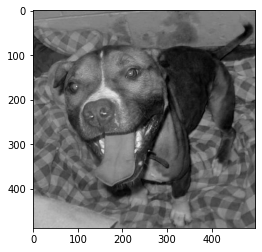

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image[:,:,0].astype('uint8'), cmap='gray')
plt.show()

generate batches of image

In [ ]:
np.shape(image)

(488, 499, 3)

In [ ]:
image = np.moveaxis(image, -1, 0)
image.shape

(3, 488, 499)

In [ ]:
image_batch = image.reshape((1,) + image.shape)

In [ ]:
np.shape(image_batch)

(1, 3, 488, 499)

Get 10 sample of the batches

In [ ]:
aug_iter=gen.flow(image_batch, batch_size=2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 3, 488, 499) (499 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


In [ ]:
aug_images=[next(aug_iter)[0].astype(np.uint8) for i in range(10)]
np.shape(aug_images)

(10, 3, 488, 499)

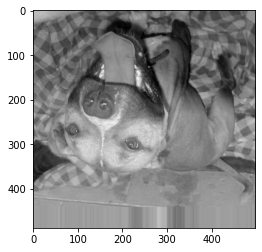

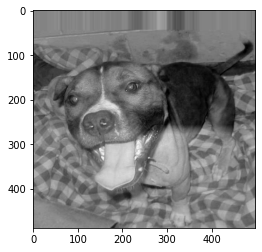

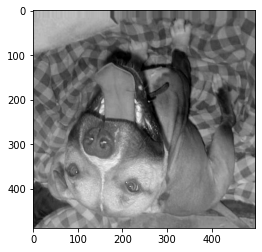

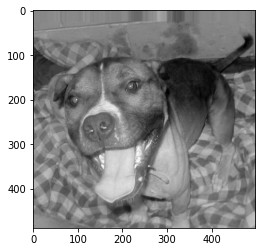

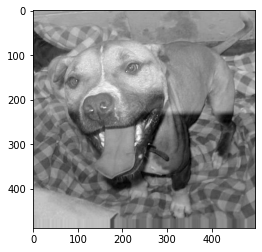

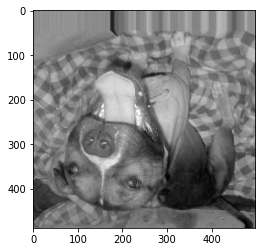

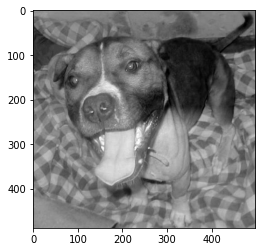

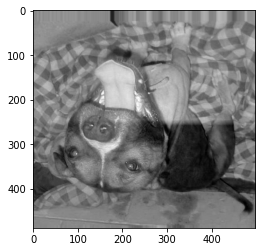

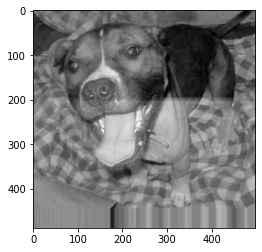

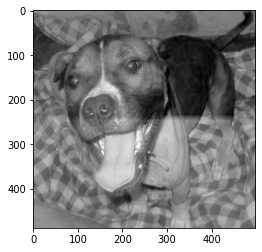

In [ ]:
for i in range(0,10):
    img = aug_images[i]
    plt.imshow(img[1,:,:].astype('uint8'), cmap='gray')
    plt.show()    